In [1]:
# ライブラリのインポート
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# sin関数にノイズを追加して訓練データ(X,y)を作成
np.random.seed(seed=8) #乱数を固定
X = np.random.uniform(0, 4, 15)[:, np.newaxis]
y = np.sin(1/4 * 2 * np.pi * X ).ravel()+np.random.normal(0, 0.3, 15)

# 特徴量の多項式変換
POLY = PolynomialFeatures(degree=6, include_bias = False)
X_pol = POLY.fit_transform(X)

In [3]:
# 正則化無しとL2正則化のモデルを作成
model = LinearRegression()
model2 = Ridge(alpha=0.1)
#model2 = Ridge(alpha=0.00001)

# 多項式変換した特徴量と正解を用いてモデルの訓練
model.fit(X_pol, y)
model2.fit(X_pol, y)

Ridge(alpha=0.1)

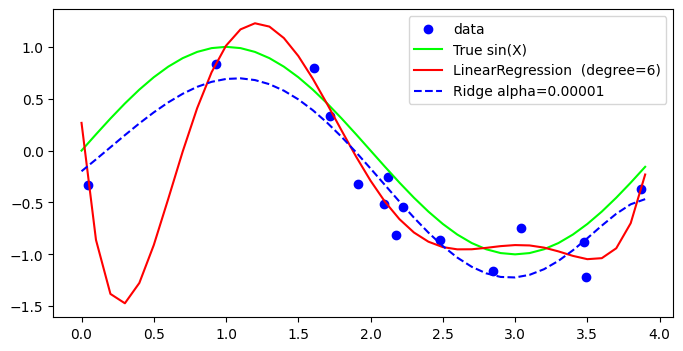

In [4]:
plt.figure(figsize=(8,4)) #プロットのサイズ指定

# プロット用にデータX_pltを作成
X_plt = np.arange(0, 4, 0.1)[:, np.newaxis]
# 正解のプロット
y_true = np.sin(1/4 * 2 * np.pi * X_plt ).ravel()
# 予測モデルのプロット
y_pred = model.predict(POLY.transform(X_plt))
y_pred2 = model2.predict(POLY.transform(X_plt))

# sin関数への正則ありとなしの線形回帰モデル
plt.scatter(X, y, color='blue', label='data')
plt.plot(X_plt, y_true, color='lime', linestyle='-' ,label='True sin(X)')
plt.plot(X_plt, y_pred, color='red', linestyle='-' ,label='LinearRegression  (degree=6)')
plt.plot(X_plt, y_pred2, color='blue', linestyle='--' ,label='Ridge alpha=0.00001')
plt.legend(loc='upper right')

plt.show()